<a href="https://colab.research.google.com/github/seanzhu815/402/blob/main/Assignment_4_402.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Part 1

## i)

In [35]:
# I have used sample cashflows. But you have to construct the entire cashflows for sleeping beauties.
df = pd.read_excel('drive/MyDrive/MGTF402/cashflows_sample.xlsx', header = 0) 


In [36]:
df.iloc[7,2]=7.55

In [37]:
df = df.iloc[range(1,len(df))]  # Remove the first NaN value
r = 7.55/100

In [38]:
for i in range(8,100):
  df.loc[i] = [1993+i, i, 7.55]

In [41]:
df.loc[100]=[2093,100,107.55]

In [45]:
df

,Year,Period,CF per $100,discount_factor
1,1994.0,1.0,7.55,1.075500
2,1995.0,2.0,7.55,1.156700
3,1996.0,3.0,7.55,1.244031
4,1997.0,4.0,7.55,1.337955
5,1998.0,5.0,7.55,1.438971
...,...,...,...,...
96,2089.0,96.0,7.55,1082.928575
97,2090.0,97.0,7.55,1164.689682
98,2091.0,98.0,7.55,1252.623753
99,2092.0,99.0,7.55,1347.196847


## ii)

In [43]:
df["discount_factor"] = (1+r)**df.index


In [44]:
df["discount_factor"]

1         1.075500
2         1.156700
3         1.244031
4         1.337955
5         1.438971
          ...     
96     1082.928575
97     1164.689682
98     1252.623753
99     1347.196847
100    1448.910209
Name: discount_factor, Length: 100, dtype: float64

In [46]:
bondvalue =  sum(df['CF per $100']/df['discount_factor'])                              # Calculate the bond value using the discount factor calculated above and the cash flows in the dataframe
print(f'The value of the bond per 100$ face value is {bondvalue:.2f}')

The value of the bond per 100$ face value is 100.00


## iii)

In [47]:
r2 = 8.55/100
df["discount_factor2"] =  (1+r2)**df.index                    # Fill in the updated discount factor
bondvalue2 =   sum(df['CF per $100']/df['discount_factor2'])                               # Fill in the bond value
print(f'The value of the bond wtth 8.55% is {bondvalue2:.2f}')

The value of the bond wtth 8.55% is 88.31


## iv) 

In [49]:
r3 = 6.55/100
df["discount_factor3"] =  (1+r3)**df.index
bondvalue3 =   sum(df['CF per $100']/df['discount_factor3'])
print(f'The value of the bond wtth 6.55% is {bondvalue3:.2f}')

The value of the bond wtth 6.55% is 115.24


## v)

In [55]:
sleepCF = df.iloc[:, [2]] 
nap_CF = df.iloc[:10, [2]]             # Cash flows of Napping beauties assuming only 5 years. You have to do this for 10 years.
nap_CF.iloc[9] = nap_CF.iloc[9] + 100

In [70]:
nap_CF

,CF per $100,discount_factor,PV
1,7.55,1.200000,6.291667
2,7.55,1.440000,5.243056
3,7.55,1.728000,4.369213
4,7.55,2.073600,3.641011
5,7.55,2.488320,3.034176
6,7.55,2.985984,2.528480
7,7.55,3.583181,2.107066
8,7.55,4.299817,1.755889
9,7.55,5.159780,1.463241
10,107.55,6.191736,17.369925


## vi)

In [57]:
# Define bond price function
def bondprice(CF, r):
    CF['discount_factor'] = (1+r)**(CF.index.values)
    CF['PV'] =  CF['CF per $100']/CF['discount_factor']                               # Complete this function
    price = CF['PV'].sum()
    return price

In [58]:
# Calculate the bond prices
sleepprice = np.zeros(20)
napprice = np.zeros(20)


In [ ]:
for i in range(1, 21):
    sleepprice[i-1] = bondprice(sleepCF,i/100) # Complete the argument
    napprice[i-1] = bondprice(nap_CF,i/100)   

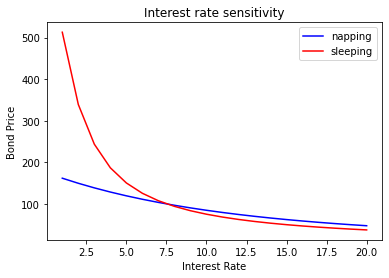

In [69]:
plt.title("Interest rate sensitivity") 
plt.xlabel("Interest Rate") 
plt.ylabel("Bond Price") 
plt.plot(range(1,21),napprice, 'b', label = "napping")
plt.plot(range(1,21),sleepprice, 'r', label = "sleeping")
plt.legend(loc="upper right")
plt.show()

## Vii)

In [72]:
bondprice(sleepCF, 0.0755)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


100.00000000000013

In [73]:
bondprice(nap_CF, 0.0755)

100.00000000000006

## x)

In [76]:
def duration(CF, r):
    CF['discount_factor'] = (1+r)**(CF.index.values)
    CF['PV'] = (CF.iloc[:,0]/CF['discount_factor'])
    CF['weights'] = CF['PV']/(CF['PV'].sum())
    CF['time'] = CF.index.values 
    duration =  sum(CF['weights']* CF['time'])                  
    return duration

In [77]:
r=7.55/100

In [78]:
macaulay_duartion_sleep = duration(sleepCF,r)           # Complete the arguments
macaulay_duartion_nap = duration(nap_CF,r)
MD_sleep = macaulay_duartion_sleep /(1+r)                                 # Compute modified duration using the Macaulay duration
MD_nap = macaulay_duartion_nap/(1+r)
delta_price_sleep = - MD_sleep*0.01
delta_price_nap = - MD_nap*0.01
print(f'The Macaulay Duration of Sleeping Beauties is {macaulay_duartion_sleep: .2f}')
print(f'The Macaulay Duration of Napping Beauties is {macaulay_duartion_nap: .2f}')
print(f'The price change of Sleeping Beauties is {delta_price_sleep: .2f}')
print(f'The price change of Napping Beauties is {delta_price_nap: .2f}')

The Macaulay Duration of Sleeping Beauties is  14.24
The Macaulay Duration of Napping Beauties is  7.37
The price change of Sleeping Beauties is -0.13
The price change of Napping Beauties is -0.07


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead